<a href="https://colab.research.google.com/github/Cidowu/Chukwudees_Portfolio/blob/main/BITCOIN_PRICE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance


In [ ]:
pip install pmdarima

In [ ]:
pip install statsmodels

In [ ]:
import yfinance as yf
import numpy as np
import itertools
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import math
import seaborn as sns
#import statsmodels.api as sm
import pmdarima
import time


from sklearn.metrics import mean_squared_error, mean_absolute_error
from datetime import datetime
from pmdarima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from pandas.tseries.offsets import DateOffset

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df =yf.download("BTC-USD")


[*********************100%***********************]  1 of 1 completed


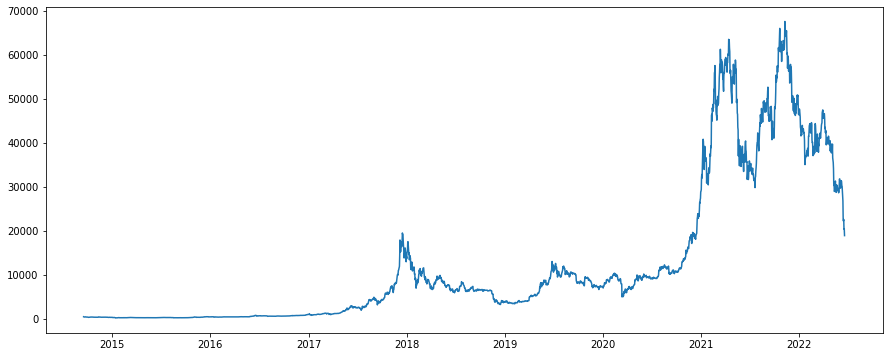

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))
plt.plot(df.index, df["Adj Close"])
plt.show()

In [ ]:
df = df[df.index >= "2020-01-01"]

In [ ]:
ts_btc = df["Adj Close"]
ts_btc.head

<bound method NDFrame.head of Date
2020-01-01     7200.174316
2020-01-02     6985.470215
2020-01-03     7344.884277
2020-01-04     7410.656738
2020-01-05     7411.317383
                  ...     
2022-06-14    22206.792969
2022-06-15    22572.839844
2022-06-16    20381.650391
2022-06-17    20471.482422
2022-06-18    18896.173828
Name: Adj Close, Length: 900, dtype: float64>

In [ ]:
decom = sm.tsa.seasonal_decompose(ts_btc, model="additive")

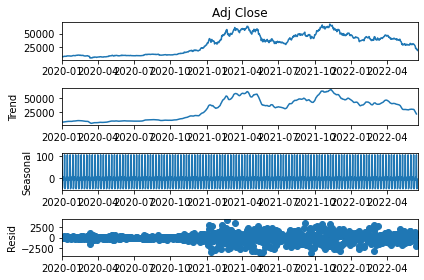

In [ ]:
decom.plot()
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


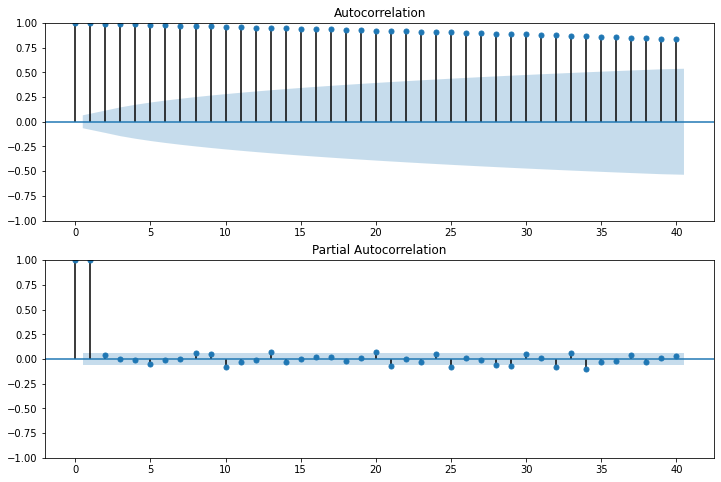

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_btc, lags = 40, ax =ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts_btc, lags= 40, ax = ax2);

In [ ]:
adtest = adfuller(ts_btc)
print(f"p-value of adfuller test is: {adtest[1]}")

p-value of adfuller test is: 0.5793675995360237


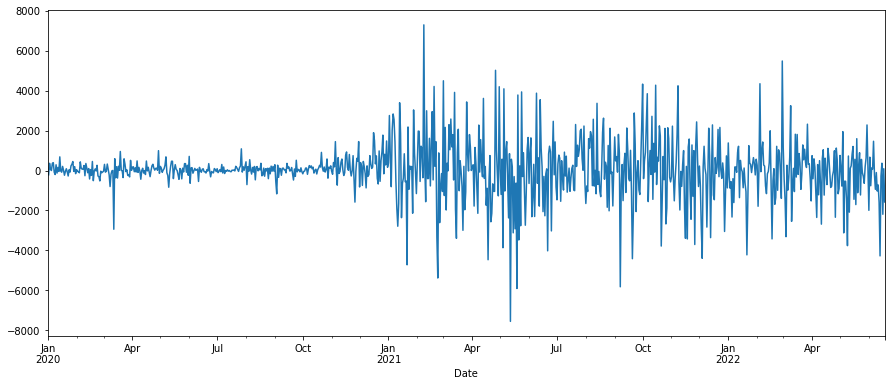

In [ ]:
ts1 = ts_btc - ts_btc.shift(1)
ts1.plot(figsize=(15, 6));

In [ ]:
adtest = adfuller(ts1.dropna())
print(f"p-value of adfuller test is: {adtest[1]}")

p-value of adfuller test is: 0.0


/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


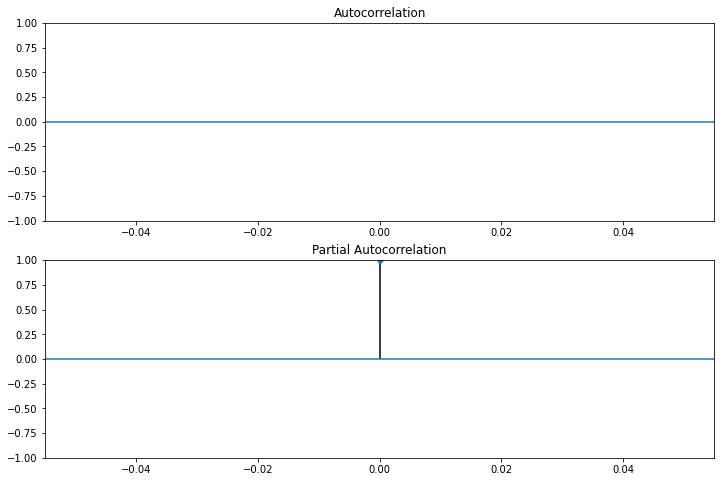

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts1, lags = 40, ax =ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts1, lags= 40, ax = ax2)

In [ ]:
cutoff_test = int(len(ts_btc.dropna()) * 0.80) 
train = ts_btc.iloc[:cutoff_test]
test = ts_btc.iloc[cutoff_test:]

print("train shape: ", train.shape)
print("test shape: ", test.shape)

train shape:  (720,)
test shape:  (180,)


In [ ]:
train_mean = train.mean()
pred_baseline = [train_mean] * len(train)

mae_baseline = mean_absolute_error(train, pred_baseline)
error_baseline = np.sqrt(mean_squared_error(train, pred_baseline))

print("Mean BTC daily closing price: ", round(train_mean, 2))
print("Baseline MAE: ", round(mae_baseline, 2))
print("Baseline RMSE: ", round(error_baseline,2))

Mean BTC daily closing price:  28950.7
Baseline MAE:  18131.7
Baseline RMSE:  19661.93


In [ ]:
p_ = range(0,36,5)
q_  = range(0,8,2)
d= range(0,2)

pdq_combo = list(itertools.product(p,d,q))

0
5
10
15
20
25
30
35


In [ ]:
# Create dictionary to store MAEs
mae_grid = dict()
rmse_grid = dict()
# Outer loop: Iterate through possible values for `p`
for p in p_:
    # Create key-value pair in dict. Key is `p`, value is empty list.
    mae_grid[p] = list()
    rmse_grid[p] = list()
    # Inner loop: Iterate through possible values for `q`
    for q in q_:
        # Combination of hyperparameters for model
        order = (p, 1, q)
        # Note start time
        start_time = time.time()
        # Train model
        model = ARIMA(train, order=order).fit()
        # Calculate model training time
        elapsed_time = round(time.time() - start_time, 2)
        print(f"Trained ARIMA {order} in {elapsed_time} seconds.")
        # Generate in-sample (training) predictions
        pred_1 = model.predict()
        # Calculate training MAE
        mae = mean_absolute_error(train, pred_1)
        rmse = np.sqrt(mean_squared_error(train, pred_1))
        # Append MAE to list in dictionary
        mae_grid[p].append(mae)
        rmse_grid[p].append(rmse)

print()
print(mae_grid)

Trained ARIMA (0, 1, 0) in 0.02 seconds.
Trained ARIMA (0, 1, 2) in 0.07 seconds.
Trained ARIMA (0, 1, 4) in 0.12 seconds.
Trained ARIMA (0, 1, 6) in 0.17 seconds.
Trained ARIMA (5, 1, 0) in 0.11 seconds.
Trained ARIMA (5, 1, 2) in 0.37 seconds.
Trained ARIMA (5, 1, 4) in 2.25 seconds.
Trained ARIMA (5, 1, 6) in 2.48 seconds.
Trained ARIMA (10, 1, 0) in 0.28 seconds.
Trained ARIMA (10, 1, 2) in 5.2 seconds.
Trained ARIMA (10, 1, 4) in 7.54 seconds.
Trained ARIMA (10, 1, 6) in 4.73 seconds.
Trained ARIMA (15, 1, 0) in 0.54 seconds.
Trained ARIMA (15, 1, 2) in 5.98 seconds.
Trained ARIMA (15, 1, 4) in 6.91 seconds.
Trained ARIMA (15, 1, 6) in 7.27 seconds.
Trained ARIMA (20, 1, 0) in 1.28 seconds.
Trained ARIMA (20, 1, 2) in 8.53 seconds.
Trained ARIMA (20, 1, 4) in 14.58 seconds.
Trained ARIMA (20, 1, 6) in 17.68 seconds.
Trained ARIMA (25, 1, 0) in 1.61 seconds.
Trained ARIMA (25, 1, 2) in 13.47 seconds.
Trained ARIMA (25, 1, 4) in 25.31 seconds.
Trained ARIMA (25, 1, 6) in 29.82 secon

In [ ]:
mae_df = pd.DataFrame(mae_grid)
rmse_df = pd.DataFrame(rmse_grid)
mae_df

,0,5,10,15,20,25,30,35
0,846.290660,842.768447,842.943014,848.778544,844.797784,844.363374,842.416306,839.799429
1,842.853593,842.168679,842.602407,847.023426,845.087557,841.404177,834.872155,843.274420
2,842.468835,843.532251,842.342431,844.086052,845.037028,845.209175,842.090505,837.138042
3,841.252906,842.490452,845.024724,845.786857,839.078269,839.540838,840.844871,839.215753


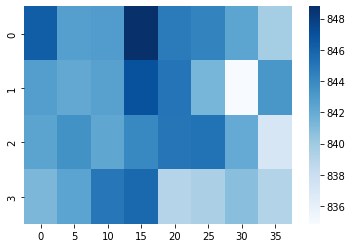

In [ ]:
mae_df
sns.heatmap(mae_df,cmap="Blues")

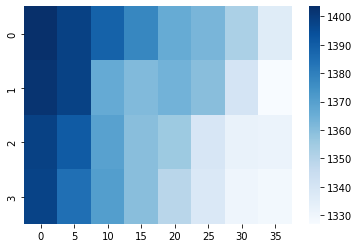

In [ ]:
sns.heatmap(rmse_df,cmap="Blues")

In [ ]:
rmse_df

,0,5,10,15,20,25,30,35
0,6315.857342,6315.857342,6315.857342,6315.857342,6315.857342,6315.857342,6315.857342,6315.857342
1,6315.857342,6315.857342,6315.857342,6315.857342,6315.857342,6315.857342,6315.857342,6315.857342
2,6315.857342,6315.857342,6315.857342,6315.857342,6315.857342,6315.857342,6315.857342,6315.857342
3,6315.857342,6315.857342,6315.857342,6315.857342,6315.857342,6315.857342,6315.857342,6315.857342


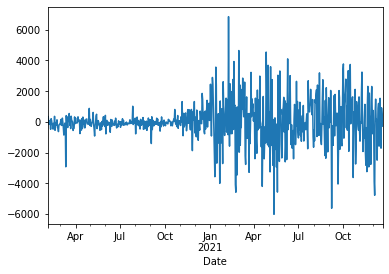

In [149]:
model1_resid = model.resid
model1_resid.plot()

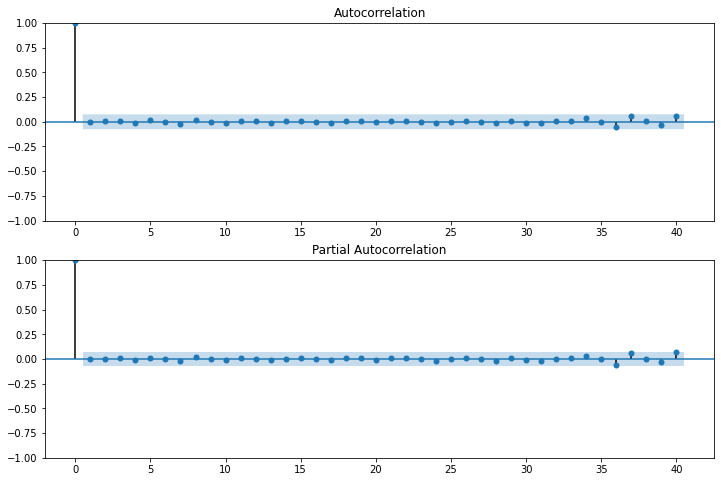

In [150]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(model1_resid, lags = 40, ax =ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(model1_resid, lags= 40, ax = ax2)

Text(0, 0.5, 'Frequency')

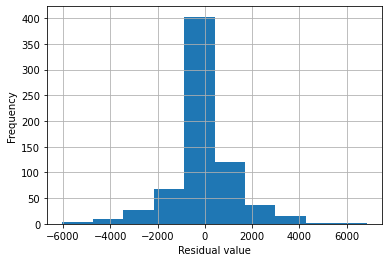

In [166]:
model1_resid.hist()
plt.xlabel("Residual value")
plt.ylabel("Frequency")
#plt.title("AR(26), Distribution of Residuals")

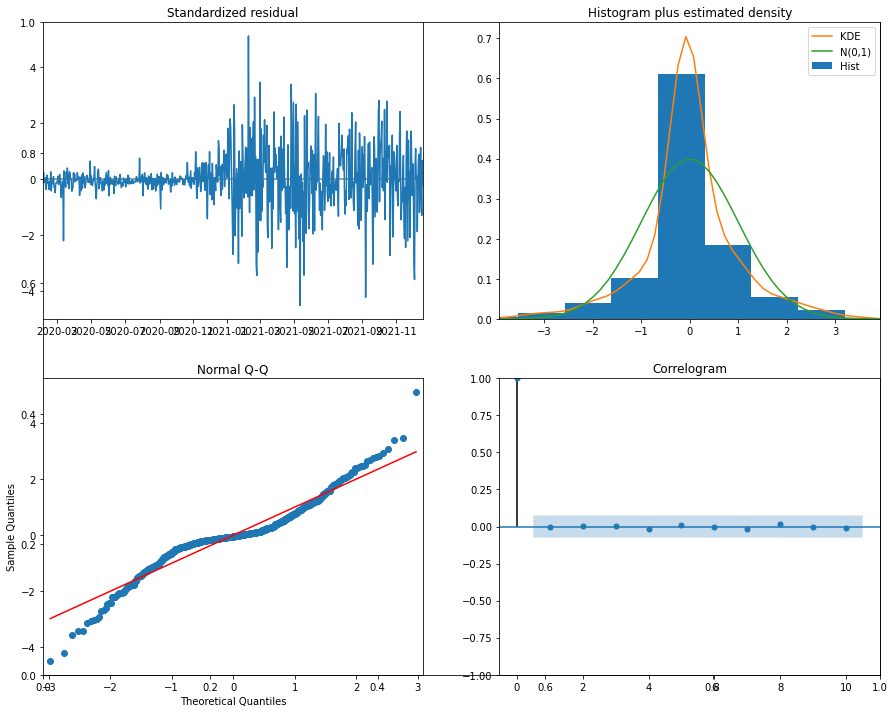

In [161]:
fig, ax = plt.subplots(figsize=(15, 12))
model.plot_diagnostics(fig=fig);

In [ ]:
# Create dictionary to store MAEs
mae_grid2 = dict()
rmse_grid2 = dict()
# Outer loop: Iterate through possible values for `p`
for p in p_:
    # Create key-value pair in dict. Key is `p`, value is empty list.
    mae_grid2[p] = list()
    rmse_grid2[p] = list()
    # Inner loop: Iterate through possible values for `q`
    for q in q_:
        # Combination of hyperparameters for model
        order = (p, 0, q)
        # Note start time
        start_time = time.time()
        # Train model
        model2 = ARIMA(train, order=order).fit()
        # Calculate model training time
        elapsed_time = round(time.time() - start_time, 2)
        print(f"Trained ARIMA {order} in {elapsed_time} seconds.")
        # Generate in-sample (training) predictions
        pred2 = model2.predict()
        # Calculate training MAE
        mae2 = mean_absolute_error(train, pred2)
        rmse2 = np.sqrt(mean_squared_error(train, pred2))
        # Append MAE to list in dictionary
        mae_grid2[p].append(mae2)
        rmse_grid2[p].append(rmse2)


In [ ]:
mae_2 = pd.DataFrame(mae_grid2)
mae_2.head()


,0,5,10,15,20,25,30,35
0,18131.703429,863.225715,863.714893,870.175179,866.559203,863.636480,862.285079,857.738168
1,5556.169924,860.002639,862.688457,865.010921,864.360040,862.728263,860.342541,857.042769
2,3353.607643,864.501863,861.920563,863.881448,867.275396,861.968873,859.634553,856.166852
3,3507.386638,863.562953,864.228793,864.085541,861.979258,863.443889,858.767893,852.463463


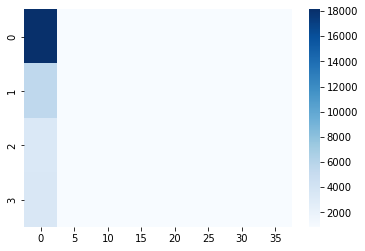

In [ ]:
sns.heatmap(mae_2,cmap="Blues")

In [ ]:
rmse_2 = pd.DataFrame(rmse_grid2)
rmse_2.head()


,0,5,10,15,20,25,30,35
0,19661.930383,1593.577079,1586.733040,1577.498844,1569.050461,1561.628124,1552.362151,1537.529279
1,6315.857342,1594.351423,1566.776604,1560.497934,1564.306124,1542.828532,1537.811905,1536.304370
2,4141.459613,1575.259850,1568.228701,1559.173731,1557.530633,1542.117719,1534.812968,1532.299514
3,4749.131718,1583.347106,1563.241859,1553.648360,1549.478732,1551.749906,1534.725065,1529.066743


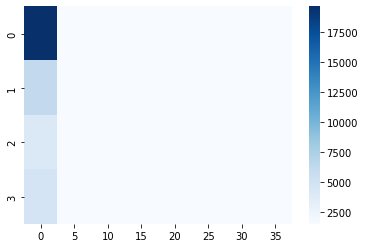

In [ ]:
sns.heatmap(rmse_2,cmap="Blues")

In [144]:
p_params = range(1, 35)
maes = []
for p in p_params:
    
    start_time = time.time()
    model3 = AutoReg(train, lags=p).fit()
    elapsed_time = round(time.time()- start_time)
    print(f"Trained AR model {p} in {elapsed_time}seconds")
    y_pred = model3.predict()
    training_mae = mean_absolute_error(train.iloc[p:], y_pred.iloc[p:])
    maes.append(training_mae)
mae_series = pd.Series(maes, name="mae", index=p_params)
mae_series.head(20)

Trained AR model 1 in 0seconds
Trained AR model 2 in 0seconds
Trained AR model 3 in 0seconds
Trained AR model 4 in 0seconds
Trained AR model 5 in 0seconds
Trained AR model 6 in 0seconds
Trained AR model 7 in 0seconds
Trained AR model 8 in 0seconds
Trained AR model 9 in 0seconds
Trained AR model 10 in 0seconds
Trained AR model 11 in 0seconds
Trained AR model 12 in 0seconds
Trained AR model 13 in 0seconds
Trained AR model 14 in 0seconds
Trained AR model 15 in 0seconds
Trained AR model 16 in 0seconds
Trained AR model 17 in 0seconds
Trained AR model 18 in 0seconds
Trained AR model 19 in 0seconds
Trained AR model 20 in 0seconds
Trained AR model 21 in 0seconds
Trained AR model 22 in 0seconds
Trained AR model 23 in 0seconds
Trained AR model 24 in 0seconds
Trained AR model 25 in 0seconds
Trained AR model 26 in 0seconds
Trained AR model 27 in 0seconds
Trained AR model 28 in 0seconds
Trained AR model 29 in 0seconds
Trained AR model 30 in 0seconds
Trained AR model 31 in 0seconds
Trained AR model 

1     840.598304
2     837.875339
3     838.739466
4     839.848516
5     840.148353
6     841.085787
7     839.935995
8     840.353872
9     841.188794
10    844.263575
11    847.047220
12    848.733308
13    853.411888
14    855.017676
15    855.492266
16    855.998037
17    856.329765
18    856.493924
19    857.345005
20    857.530005
Name: mae, dtype: float64

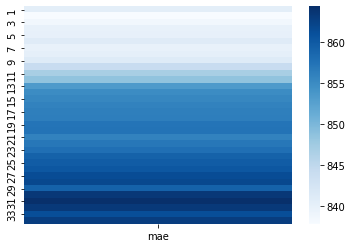

In [ ]:
sns.heatmap(mae_series.to_frame(),cmap="Blues")

In [153]:
model_3_resid = model3.resid

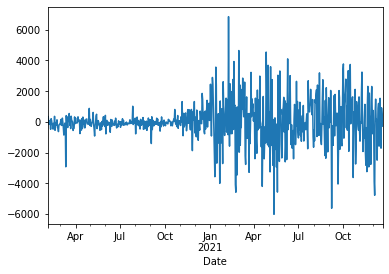

In [154]:
model_3_resid.plot();

Text(0, 0.5, 'Frequency')

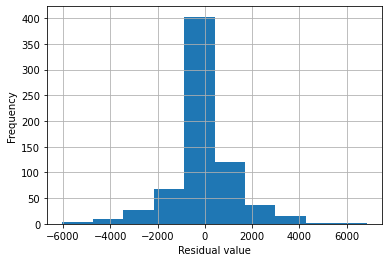

In [164]:
model_3_resid.hist()
plt.xlabel("Residual value")
plt.ylabel("Frequency")
#plt.title("AR(26), Distribution of Residuals")

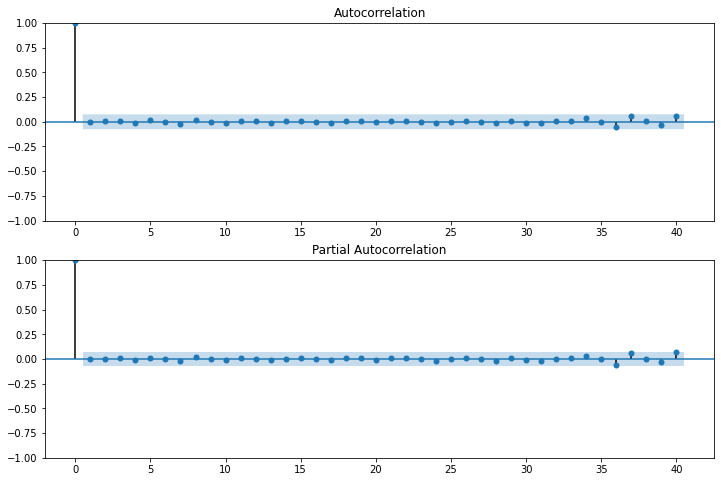

In [156]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(model_3_resid, lags = 40, ax =ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(model_3_resid, lags= 40, ax = ax2)

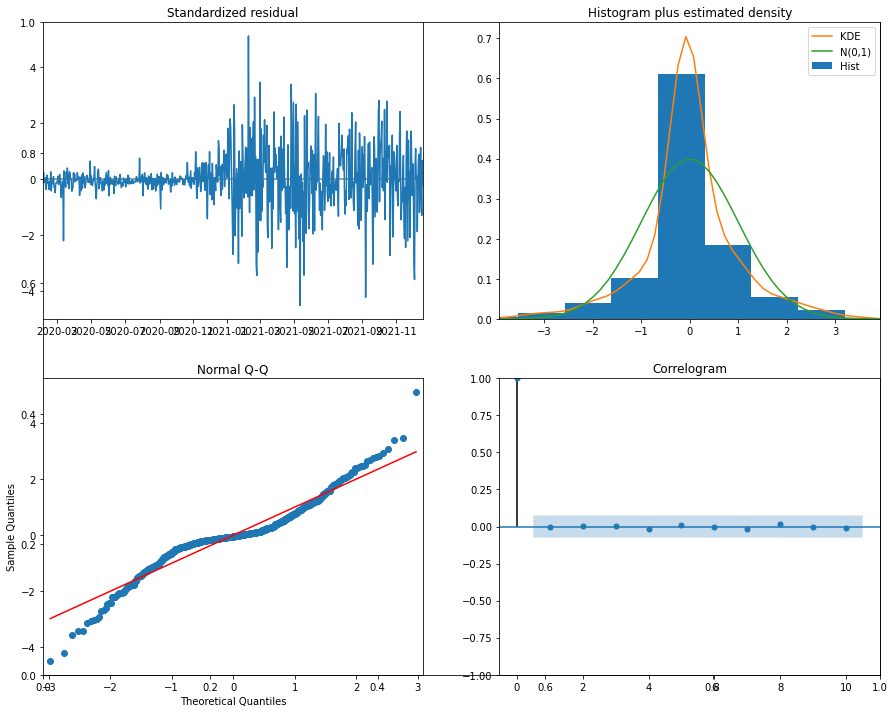

In [160]:
fig, ax = plt.subplots(figsize=(15, 12))
model3.plot_diagnostics(fig=fig);

### Evaluate AutoRegression

In [223]:
pred_wfv = pd.Series()
history = train.copy()

In [224]:
for i in range(len(test)):
  final_model = AutoReg(history, lags=1).fit()
  next_pred = final_model.forecast()
  pred_wfv = pred_wfv.append(next_pred)
  history = history.append(test[next_pred.index])

In [225]:
test_mae = mean_absolute_error(test, pred_wfv)
test_error = np.sqrt(mean_squared_error(test, pred_wfv))

print("Test MAE[WALK FORWARD VALIDATION]: ", round(test_mae, 2))
print("Test RMSE[WALK FORWARD VALIDATION]: ", round(test_error, 2))

Test MAE[WALK FORWARD VALIDATION]:  975.7
Test RMSE[WALK FORWARD VALIDATION]:  1356.14


In [226]:
#print(final_model.summary())

## Communicate

In [227]:
df_pred = pd.DataFrame({"test": test, "pred_wfv": pred_wfv})
fig = px.line(df_pred, labels =  {"value": "Adj Closing"})
fig.show()

## Future Forecasts

In [197]:
future_dates = [df.index[-1] + DateOffset(months=x) for x in range(0, 8)]
future_dataset_series = final_model.predict(start=899, end = 1000, dynamic=True)
future_series = pd.concat([ts_btc, future_dataset_series])
future_series.tail()

2022-09-23    24796.282820
2022-09-24    24833.034884
2022-09-25    24869.655173
2022-09-26    24906.144159
2022-09-27    24942.502313
dtype: float64

In [229]:
fig = px.line(future_series, labels =  {"value": "Adj Closing"})
fig.show()

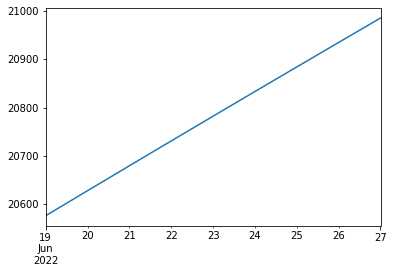

In [183]:
final_pred = final_model.predict(len(ts_btc), len(ts_btc)+8)
final_pred.plot()

In [ ]:
mae_grid = dict()
rmse_grid = dict()

for i in p:
    mae_grid[p] = list()
    rmse_grid[p] = list()
    
    for j in q:
      order = (p, 1, q)
      start = time.time()
      model = ARIMA(train, order=(pdq)).fit()
      elapsed_time = round(time.time() -start, 2)
      print(f"Trained ARIMA model {order} in {elapsed_time} seconds.")
      pred = model.predict()
      mae = mean_absolute_error(train, pred)
      rmse = np.sqrt(mean_squared_error(train, pred))
      mae_grid[p].append(mae)
      rmse_grid[p].append(rmse)
